# Appendix

# Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

from IPython.display import display

%matplotlib inline

# Loading the data

In [3]:
#Load data from CSV file
data = pd.read_csv('results.csv')
#Correct the error
data = data.replace({'Germany DR': 'Germany'})
#Clean NaN in data
data.dropna()
#A quick overview
display(data.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Preparing the data

There are many features in this dataset although other ones might be interesting as well for our project, for example, if the winner is the home team or the goal difference. This features will increase the accuracy of the prediction models.

Also, statistics from 1872 are not as important as the ones from recent years either because of the players or even the coach.

In [4]:
#Date to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

#Calculate the difference of years
data.loc[:,'year_diff'] = 2018-data['date'].dt.year.astype('int64')

#Overview
display(data.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,146
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,145
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,144
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,143
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,142


In [5]:
#Function for year scale in old, mid or recent match
def year_sc(data):
    year_sc = []
    for i, row in data.iterrows():
        if row['year_diff'] > 38:
            year_sc.append('Old')
        elif row['year_diff'] < 18:
            year_sc.append('Recent')
        else:
            year_sc.append('Mid')
    return year_sc

#Apply to the data
data['year_sc'] = year_sc(data)

data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_diff,year_sc
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,146,Old
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,145,Old
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,144,Old
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,143,Old
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,142,Old


In [6]:
#Adding goal difference

#Compare scores row by row
def goal_diff(row):
    return row['home_score']-row['away_score']

#Add the column 'winner' to the dataset    
data['goal_diff'] = data.apply(lambda row: goal_diff(row), axis=1)

#Overview
display(data.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_diff,year_sc,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,146,Old,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,145,Old,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,144,Old,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,143,Old,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,142,Old,3


In [7]:
#Adding the winner feature

#Compare scores row by row
def winner(row):
    if row['home_score'] > row['away_score']: 
        return 'Home'
    elif row['home_score'] < row['away_score']: 
        return 'Away'
    else:
        return 'Draw'

#Add the column 'winner' to the dataset    
data['winner'] = data.apply(lambda row: winner(row), axis=1)

#Overview
display(data.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_diff,year_sc,goal_diff,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,146,Old,0,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,145,Old,2,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,144,Old,1,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,143,Old,0,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,142,Old,3,Home


# Some statistics

It is interesting to study the percentage of home wins and away wins to evaluate the accuracy of predictions.

In [8]:
#Total number of matches = number of observations = data shape
total_matches = data.shape[0]

print ("Total matches: {}".format(total_matches))

Total matches: 38949


In [9]:
#Count the winning values
win_counts = data['winner'].value_counts()

#Show
win_counts

Home    18946
Away    10975
Draw     9028
Name: winner, dtype: int64

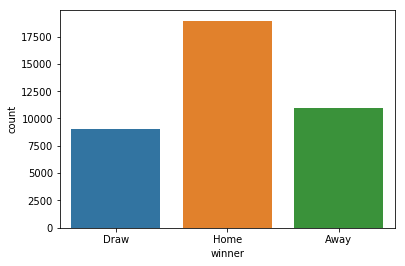

In [10]:
#Plot winner feature
sns.countplot(x="winner", data=data)
plt.show()

In [11]:
#Win rate
homeW_rate = (win_counts[0]/total_matches)*100
awayW_rate = (win_counts[1]/total_matches)*100
ties_rate = (win_counts[2]/total_matches)*100

print ("Home team win rate: {:.2f}%".format(homeW_rate))
print ("Away team win rate: {:.2f}%".format(awayW_rate))
print ("Ties: {:.2f}%".format(ties_rate))

Home team win rate: 48.64%
Away team win rate: 28.18%
Ties: 23.18%


Home team win rate is higher than the away team win rate. It means that when a team plays as a home team, it has more chance to score to win.

The most common case is that home team wins. Away team has a half chance to win but in the best of the cases, the match can end in a draw.

In [12]:
#Mean of score
score_home_m = data['home_score'].mean()
score_away_m = data['away_score'].mean()
score_diff_m = data['goal_diff'].mean()

print ("Home score mean: {:}".format(score_home_m))
print ("Away score mean: {:}".format(score_away_m))
print ("Score difference mean: {:}".format(score_diff_m))

Home score mean: 1.7409946340085753
Away score mean: 1.1804154150299109
Score difference mean: 0.5605792189786644


In [13]:
#Count of tournaments

#Count all matches per tournament and count them
TournamentCount = data.groupby(by=['tournament'])['home_team'].agg({'Count': np.size})
#Convert to int
TournamentCount['Count'] = TournamentCount['Count'].astype(int)
#Sort values in descending order
TournamentCount = TournamentCount.sort_values(by = 'Count', ascending=False)

TournamentCount.head()

,Count
tournament,
Friendly,16398
FIFA World Cup qualification,7100
UEFA Euro qualification,2332
African Cup of Nations qualification,1558
FIFA World Cup,836


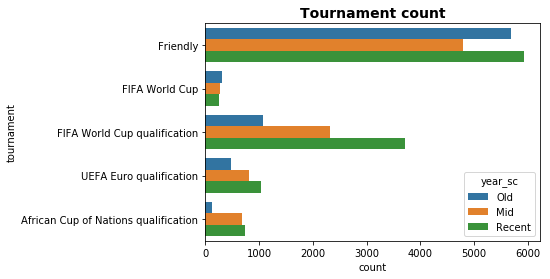

In [14]:
#For the top 5 tournaments
topTournament = np.array(TournamentCount.head(5).index)

#Data for the top 5 tournaments
topTournamentData = data[data['tournament'].isin(topTournament)]

#Plot
plt.title('Tournament count', fontsize = 14, weight = 'bold')
ax = sns.countplot(y="tournament", hue="year_sc", data=topTournamentData)
plt.show()

In [15]:
#Winner counts

#Group home teams per tournament and count them
winnerCount = data.groupby(by=['home_team'])['tournament'].agg({'Count': np.size})
#Convert to int
winnerCount['Count'] = winnerCount['Count'].astype(int)
#Sort values in descending order
winnerCount = winnerCount.sort_values(by = 'Count', ascending=False)

winnerCount.head()

,Count
home_team,
Brazil,548
Argentina,532
Germany,492
Mexico,492
England,479


In [16]:
#Group away teams per tournament and count them
winnerACount = data.groupby(by=['away_team'])['tournament'].agg({'Count': np.size})
#Convert to int
winnerACount['Count'] = winnerACount['Count'].astype(int)
#Sort values in descending order
winnerACount = winnerACount.sort_values(by = 'Count', ascending=False)

winnerACount.head()

,Count
away_team,
Uruguay,524
Sweden,518
England,496
Hungary,466
Paraguay,440


In [17]:
#For the top 10 teams
topHomeTeams = np.array(winnerCount.head(10).index)
topAwayTeams = np.array(winnerACount.head(10).index)

#Data for the top 5 tournaments
topHTData = data[data['home_team'].isin(topHomeTeams)]
topATData = data[data['away_team'].isin(topAwayTeams)]

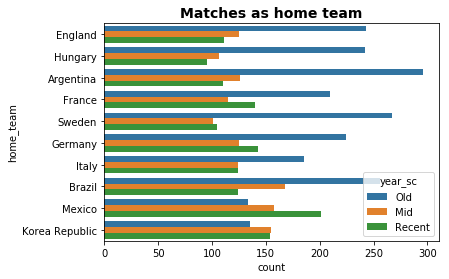

In [18]:
#Plot for home team
plt.title('Matches as home team', fontsize = 14, weight = 'bold')
ax = sns.countplot(y="home_team", hue="year_sc", data=topHTData)
plt.show()

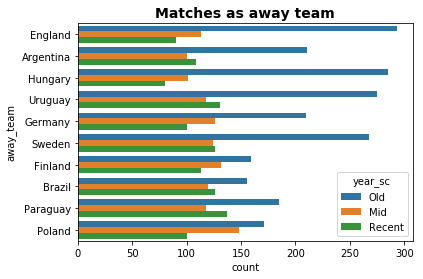

In [19]:
#Plot for away team
plt.title('Matches as away team', fontsize = 14, weight = 'bold')
ax = sns.countplot(y="away_team", hue="year_sc", data=topATData)
plt.show()

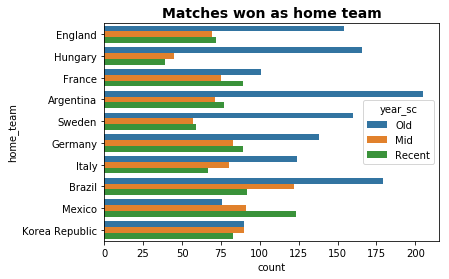

In [20]:
#Select just the won matches for home team (no ties)
homeTWinners = topHTData[topHTData.winner == 'Home']

#Plot for home team
plt.title('Matches won as home team', fontsize = 14, weight = 'bold')
ax = sns.countplot(y="home_team", hue="year_sc", data=homeTWinners)
plt.show()

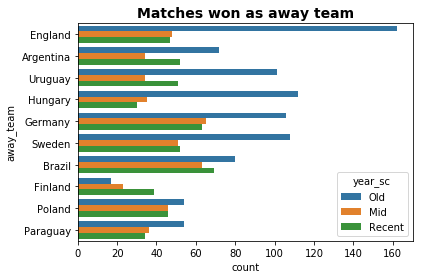

In [21]:
#Select just the won matches (no ties) for away teams
awayTWinners = topATData[topATData.winner == 'Away']

#Plot for home team
plt.title('Matches won as away team', fontsize = 14, weight = 'bold')
ax = sns.countplot(y="away_team", hue="year_sc", data=awayTWinners)
plt.show()

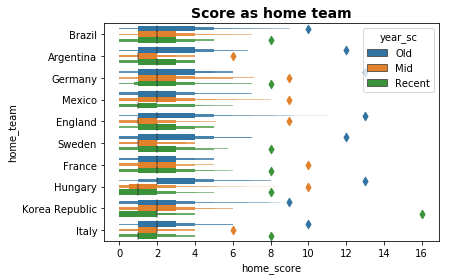

In [22]:
#Plot score per home team
plt.title('Score as home team', fontsize = 14, weight = 'bold')
ax = sns.lvplot(data=topHTData, x="home_score", y="home_team", order=topHomeTeams, hue="year_sc")
plt.show()

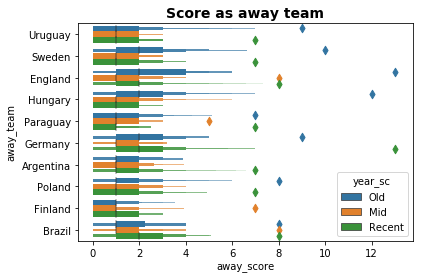

In [23]:
#Plot score per away team
plt.title('Score as away team', fontsize = 14, weight = 'bold')
ax = sns.lvplot(data=topATData, x="away_score", y="away_team", order=topAwayTeams, hue="year_sc")
plt.show()

# Comparison of predicting models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

The interest of the model is predicting who is the winning team. For that, I split the data into input and output ('winner') features.  

In [25]:
#Select input features
input_features_dt = data.drop(['date','home_score','away_score','tournament','city','country','year_sc','year_diff','neutral','winner'],axis = 1)

In [26]:
#Label encoder for team names
le = preprocessing.LabelEncoder()
#Select the columns to encode
normData=input_features_dt[['home_team','away_team']]
#Encode data
normData = normData.apply(le.fit_transform)
#Join the goal_diff column
input_features = pd.concat([normData, data['goal_diff']], axis=1)
input_features.head(2)

,home_team,away_team,goal_diff
0,182,64,0
1,64,180,2


In [27]:
#from sklearn.preprocessing import StandardScaler

#To scale the data
#scaler = StandardScaler()
#input_features = scaler.fit_transform(input_features)
#display(input_features)

In [28]:
#'winner' feature
output_feature = data['winner']

In [29]:
#Slip the data depending on the input and output features defined to train the classifier
X_train,X_test,y_train,y_test = train_test_split(input_features,output_feature,random_state=42,test_size=0.33)

#Show X_train head
pd.DataFrame(X_train).head()

,home_team,away_team,goal_diff
2089,61,166,-8
4739,223,210,1
4286,56,52,1
17859,181,49,1
23791,119,47,0


### K-nearest neighbours algorithm

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#Set the classifier to 5 neighbors
clf_knn = KNeighborsClassifier(n_neighbors=5)
#Train the classifier with the train data
clf_knn = clf_knn.fit(X_train,y_train)

In [32]:
#Test the prediction with the test data
pred_knn = clf_knn.predict(X_test)

In [33]:
#Calculate the accuracy of the model
accuracy_knn = (sum(pred_knn==y_test)/pred_knn.shape[0])*100

print("Accuracy= {0:.2f}%".format(accuracy_knn))

Accuracy= 79.57%


### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
#Logistic Regression model
logReg = LogisticRegression()
#Train the classifier with the train data
logReg = logReg.fit(X_train,y_train)

In [36]:
#Test the prediction with the test data
pred_logR = logReg.predict(X_test)

In [37]:
#Calculate the accuracy of the log regression model
accuracy_logR = (sum(pred_logR==y_test)/pred_logR.shape[0])*100

print("Accuracy= {0:.2f}%".format(accuracy_logR))

Accuracy= 100.00%


In [38]:
#The estimated coefficients will all be around 1
print(logReg.coef_)

[[-4.96220345e-03 -4.46852735e-03 -1.14610440e+01]
 [ 1.82261553e-04 -5.99324109e-04 -1.41617013e-01]
 [-4.64192999e-03 -4.40661856e-03  1.21421472e+01]]


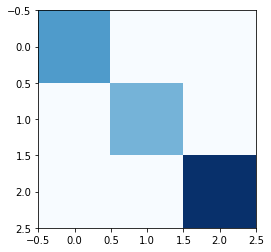

In [39]:
from sklearn.metrics import confusion_matrix

#Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, pred_logR)
#Show
plt.imshow(confusion_matrix, cmap='Blues', clim = (0, confusion_matrix.max())) 

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [41]:
#Create the model
clf_dtree = DecisionTreeClassifier(random_state=15)

In [42]:
#Fit the model with the training set
clf_dtree = clf_dtree.fit(X_train,y_train)

In [43]:
#Predict for testing
pred_dtree = clf_dtree.predict(X_test)

#Test the prediction for this model
crossval_dtree = cross_val_predict(clf_dtree, X_test, y_test)

In [44]:
#Calculate the accuracy of the decision tree
accuracy_dTree = (sum(pred_dtree==y_test)/pred_dtree.shape[0])*100

print("Accuracy= {0:.2f}%".format(accuracy_dTree))

#Using the cross validation function
scores = cross_val_score(clf_dtree, X_train, y_train, scoring='accuracy')

print("Accuracy (cross-val)= {0:.2f}%".format(np.mean(scores)*100))

Accuracy= 100.00%
Accuracy (cross-val)= 100.00%


In [45]:
print(clf_dtree.feature_importances_)

[0. 0. 1.]


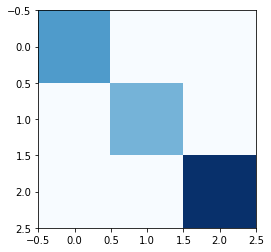

In [46]:
from sklearn.metrics import confusion_matrix

#Calculate the confusion matrix
confusionM_dtree = confusion_matrix(y_test, pred_dtree)
#Show
plt.imshow(confusionM_dtree, cmap='Blues', clim = (0, confusionM_dtree.max()))

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
#Creation of the model
clf_rForest = RandomForestClassifier(n_estimators=100, max_depth=5)
#Train the model
clf_rForest = clf_rForest.fit(X_train,y_train)

In [49]:
#Test the predictions
pred_rForest = clf_rForest.predict(X_test)

In [50]:
#Calculate the accuracy of the random forest model
accuracy_rForest = (sum(pred_rForest==y_test)/pred_rForest.shape[0])*100

print("Accuracy= {0:.2f}%".format(accuracy_rForest))

Accuracy= 100.00%


In [51]:
print(clf_rForest.feature_importances_)

[0.00777826 0.00520849 0.98701325]


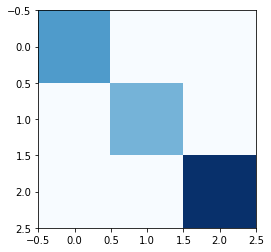

In [52]:
from sklearn.metrics import confusion_matrix

#Calculate the confusion matrix
confusionM_rForest = confusion_matrix(y_test, pred_rForest)
#Show
plt.imshow(confusionM_rForest, cmap='Blues', clim = (0, confusionM_rForest.max()))

## Predicting the World Cup 2018

In [53]:
#Preparing data for score functions
score_data = pd.concat([normData, data[['home_score','away_score']]], axis=1)

score_data.head()

,home_team,away_team,home_score,away_score
0,182,64,0,0
1,64,180,4,2
2,182,64,2,1
3,64,180,2,2
4,182,64,3,0


In [54]:
#Score mean function for home teams
def teamScore_mean(team):
    
    #Filter as home team
    data_aux1 = score_data[score_data.home_team == team]
    data_aux2 = score_data[score_data.away_team == team]

    #Total mean
    homeSc_mean = (data_aux1.home_score.mean()+data_aux2.away_score.mean())/2
    
    return homeSc_mean

In [55]:
def team_number(teamName):
    #Select the team name
    label_data_aux = label_data[label_data.team_name == teamName]
    #Labeled name
    teamNumber = label_data_aux.team_number[0]
    
    return teamNumber

In [56]:
def team_name(teamNum):
    #Select the team number
    label_data_aux = label_data[label_data.team_number == teamNum]
    #Labeled name
    teamName = label_data_aux.team_name[0]
    
    return teamName

In [57]:
#Margin of error
margin = 0.05

#Function to calculate the probability of winning
def prob_win(home_team, away_team):
    
    #Creation of the row
    dt = pd.DataFrame(np.array([[np.nan, np.nan, np.nan]]), columns=X_test.columns)
    
    #homeTeam_name = team_name(home_team)
    #awayTeam_name = team_name(away_team)
    
    #Initialize variables
    dt['home_team'] = home_team
    dt['away_team'] = away_team
    dt['goal_diff'] = teamScore_mean(home_team)-teamScore_mean(away_team)

    #Probability of winning the home team
    pred_probs = clf_rForest.predict_proba(dt)
    pHomeWin = pred_probs[:,1][0]
    
    #Compare
    if pHomeWin <= 0.5-margin:
        print("{} vs {}. \nWinner: {}. Probability: {}%.".format(home_team,away_team,away_team,(1-pHomeWin)*100))
    else:
        if pHomeWin > 0.5+margin:
            print("{} vs {}. \nWinner: {}. Probability: {}%.".format(home_team,away_team,home_team,pHomeWin*100))
        else:
            print("{} vs {}. \nDRAW. Probability: {}%.".format(home_team,away_team,pHomeWin*100))
    


In [112]:
prob_win(171,170)

171 vs 170. 
Winner: 171. Probability: 76.71269792726223%.
